### **Importing Libraries**

In [46]:
import os ### For iterating in directories
import keras ### For Deeplearning
from keras.models import Sequential ### For initializing sequential model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization ### Layers to be used in deep learning model
from PIL import Image ### For showing Image
import numpy as np ### For numerical operations
import pandas as pd ### For manipulating dataframes
import matplotlib.pyplot as plt ### For plotting graphs
from sklearn.model_selection import train_test_split ### For splitting the data into training and testing
from sklearn.preprocessing import OneHotEncoder ### For one-hot-encoding the labels
from matplotlib.pyplot import imshow ### For showing Images

### **Data Preprocessing**

In [47]:
### Creating one hot encoding instance for following label encoding purposes
### 0 - Tumor
### 1 - Normal

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


OneHotEncoder()

### **Reading Dataset**

> #### **For Tumor Class**

In [48]:
### This cell updates result list for images with tumor


### Empty Lists to append relevant data
data = []
paths = []
result = []

for r, d, f in os.walk(r'./brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file: ### Cleaning and saving only jpgs
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

### We have features into data list (the images)
### We have their labels in result list (1 or 0)

> #### **For No-Tumor Class**

In [49]:
# This cell updates result list for images without tumor

### Empty Lists to append relevant data
paths = []
for r, d, f in os.walk(r"./brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file: ### Cleaning and saving only jpgs
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

### We have features into data list (the images)
### We have their labels in result list (1 or 0)

### **Data Preprocessing (Continued)**

In [50]:
### Final Shape of Data
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [51]:
### Reshaping Data Shape to make it compatible for model

result = np.array(result)
result = result.reshape(139,2)

> #### **Splitting the Dataset**

In [52]:
### Splitting the data into train and test split
### keeping 20% of the data for test data
### Shuffling the data while doing the split

x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

### **Defining Model Structure**

In [53]:
### Initializing Sequential Model
model = Sequential()

### Block 1 consists of 2 Convolution layers, a batch normalization layer, Maxpooling layer and finally dropout layer to avoid overfitting
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
### Block 2 consists of 2 Convolution layers, a batch normalization layer, Maxpooling layer and finally dropout layer to avoid overfitting
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
### Flattening the output from previous layer to make a single vector to be fed into fully connected dense layer
model.add(Flatten())
### Fully connected layer 1
model.add(Dense(512, activation='relu'))
### Dropout layer to avoid overfitting
model.add(Dropout(0.5))
### Final Fully connected layer 2 with 2 units as we have 2 classes, and softmax function as activation
model.add(Dense(2, activation='softmax'))


### Compiling the model
model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
### Printing the model's summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)       

### **Training the Model**
> Training the model on training data set and passing test data so we can get test accuracy after each epoch

In [54]:
### Training the model for 30 epochs

history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 2s 664ms/step - loss: 14.4014 - accuracy: 0.5946 - val_loss: 155.1378 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 2s 589ms/step - loss: 10.9146 - accuracy: 0.7387 - val_loss: 27.8735 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 2s 558ms/step - loss: 7.0716 - accuracy: 0.7748 - val_loss: 38.5570 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 2s 551ms/step - loss: 1.7687 - accuracy: 0.8919 - val_loss: 67.6913 - val_accuracy: 0.6071
Epoch 5/30
3/3 [==============================] - 2s 544ms/step - loss: 4.8396 - accuracy: 0.8559 - val_loss: 41.1911 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 2s 554ms/step - loss: 1.2527 - accuracy: 0.9640 - val_loss: 16.5513 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 2s 563ms/step - loss: 1.2443 - accuracy: 0.9189 - val_loss: 13.7170 - val_accuracy: 0.6786
Epoch 8/30

### **Model Loss Plot**

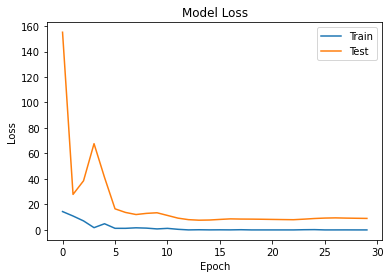

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

> **Conclusion:** We can see both training and testing loss started high but kept on decreasing with the training, this is a good sign. Also the model is not overfitting since both loss decreased, a model overfits when training loss decreases but testing loss increases at some point

### **Model Accuracy Plot**

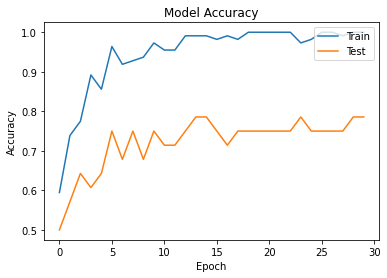

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

> **Conclusion:** We can see the both training and testing accuracy increased as a final trend, we are seeing a dip in testing accuracy at around 15th epoch, which means model did try to overfit but optimizer function get rid of that situatoin and then accuracy increased in general

### **Model Evaluation**

In [57]:
### Passing the testing data and ground truth labels into evaluate model to see final accuracy

model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 89ms/step - loss: 9.0248 - accuracy: 0.7857


[9.024826049804688, 0.7857142686843872]

> We can see that the model is giving us the final accuracy of 89.29% on test data which is a great accuracy for unseen data

### **Prediction using Model**

In [58]:
### This function takes the output prediction from model and map it with a string outcome

def label_to_name_mapping(number):
    if number==0:
        return 'a Tumor'
    else:
        return 'not a tumor'

> #### **Testing on a No-Tumor Image**

100.0% Confidence This is not a tumor


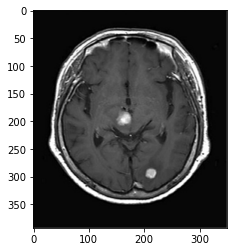

In [59]:
img = Image.open(r"./brain_tumor_dataset/no/N17.jpg") ### Loading image
x = np.array(img.resize((128,128))) ### Reshaping image to out required model's input size
x = x.reshape(1,128,128,3) ### Expanding dimension to make it compatible for model
res = model.predict_on_batch(x) ### Predicting using the model
classification = np.where(res == np.amax(res))[1][0] ### Getting the class label with maximum probability
imshow(img) ### Printing image
print(str(res[0][classification]*100) + '% Confidence This is ' + label_to_name_mapping(classification)) ### Printing predicted output

> #### **Testing on a Tumor Image**

100.0% Confidence This is  a Tumor


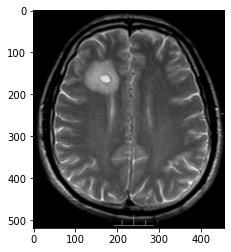

In [60]:
img = Image.open(r"./brain_tumor_dataset/yes/Y3.jpg") ### Loading image
x = np.array(img.resize((128,128))) ### Reshaping image to out required model's input size
x = x.reshape(1,128,128,3) ### Expanding dimension to make it compatible for model
res = model.predict_on_batch(x) ### Predicting using the model
classification = np.where(res == np.amax(res))[1][0] ### Getting the class label with maximum probability
imshow(img) ### Printing image
print(str(res[0][classification]*100) + '% Confidence This is  ' + label_to_name_mapping(classification)) ### Printing predicted output

> ### **Lessons Learned**

> ### **We learned a lot about convolutional neural networks since it is most commonly used to analyze visual imagery, binary classification, and supervised learning.  We had to learn about what a image actually is, which is a matrix of pixels values (which is really cool and something that we didn't realize) once we figured that out we had to learn how to flatten the image to get a 9x1 vector. Then, came the most complicated part of the project which was actually making the neural networks.**
 > ### **First, we had to figure out what kind of neural network we were going to use (we didn't even know there was different kinds of neural networks until we actually started researching them). It took some time researching and understanding how a convolutional neural network work (we decided to go with this one because it was the most common one used for image datasets). We had to learn about adding dropout layers in between convolution layers to reduce the complexity of data to avoid overfitting. Same as dimensionality reduction but the difference is that we had images dataset.**